In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
pip install squarify

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/opt/tljh/user/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import squarify

In [4]:
# set a grey background
sns.set(style="darkgrid")

In [5]:
courses = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-kornilova-25/My_Projects/1_Project_e_learing/courses.csv')

In [6]:
courses.shape

(22, 3)

In [7]:
courses.head()

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240


code_module — предмет (идентификационный код).

code_presentation — семестр (идентификационный код).

module_presentation_length — продолжительность семестра в днях.

In [8]:
courses.isna().sum() #checking for missing values

code_module                   0
code_presentation             0
module_presentation_length    0
dtype: int64

In [9]:
assessments = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-kornilova-25/My_Projects/1_Project_e_learing/assessments.csv')

In [10]:
assessments.shape

(206, 6)

In [11]:
assessments.isna().sum() #checking for missing values

code_module           0
code_presentation     0
id_assessment         0
assessment_type       0
date                 11
weight                0
dtype: int64

In [12]:
assessments.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0


code_module — идентификационный код предмета.

code_presentation — семестр (Идентификационный код).

id_assessment — тест (Идентификационный номер ассессмента).

assessment_type — тип теста. Существуют три типа оценивания: оценка преподавателя (TMA), компьютерная оценка (СМА), экзамен по курсу (Exam).

date — информация об окончательной дате сдачи теста. Рассчитывается как количество дней с момента начала семестра. Дата начала семестра имеет номер 0 (ноль).

weight — вес теста в % в оценке за курс. Обычно экзамены рассматриваются отдельно и имеют вес 100%; сумма всех остальных оценок составляет 100%.

In [13]:
studentAssessment = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-kornilova-25/My_Projects/1_Project_e_learing/studentAssessment.csv')

In [14]:
studentAssessment.shape

(173912, 5)

In [15]:
studentAssessment.isna().sum() #checking for missing values

id_assessment       0
id_student          0
date_submitted      0
is_banked           0
score             173
dtype: int64

In [16]:
studentAssessment.head()

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0


id_assessment — тест (идентификационный номер).

id_student — идентификационный номер студента.

date_submitted — дата сдачи теста студентом, измеряемая как количество дней с начала семестра.

is_banked — факт перезачета теста с прошлого семестра (иногда курсы перезачитывают студентам, вернувшимся из академического отпуска).

score — оценка учащегося в этом тесте. Диапазон составляет от 0 до 100. Оценка ниже 40 неудачная/неуспешная сдача теста.

In [17]:
studentRegistration = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-kornilova-25/My_Projects/1_Project_e_learing/studentRegistration.csv')

In [18]:
studentRegistration.shape

(32593, 5)

In [19]:
studentRegistration.isna().sum() #checking for missing values

code_module                0
code_presentation          0
id_student                 0
date_registration         45
date_unregistration    22521
dtype: int64

<font color = 'blue'> 0. Что должно считаться курсом?

Критерии:

-факты сдачи экзаменов,

-распределения студентов,

-уникальный идентефикатор курса.

In [20]:
courses.code_module.unique() #список всех предметов

array(['AAA', 'BBB', 'CCC', 'DDD', 'EEE', 'FFF', 'GGG'], dtype=object)

In [21]:
assessments.code_module.unique() #по всем предметам проходили тесты

array(['AAA', 'BBB', 'CCC', 'DDD', 'EEE', 'FFF', 'GGG'], dtype=object)

In [22]:
#объединим таблицы studentAssessment и assessments, чтобы в результатах видеть сразу тип экзамена
Assessments_big = (studentAssessment.merge(assessments, 
                                            how='inner', on='id_assessment', indicator=False))
Assessments_big.head()

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight
0,1752,11391,18,0,78.0,AAA,2013J,TMA,19.0,10.0
1,1752,28400,22,0,70.0,AAA,2013J,TMA,19.0,10.0
2,1752,31604,17,0,72.0,AAA,2013J,TMA,19.0,10.0
3,1752,32885,26,0,69.0,AAA,2013J,TMA,19.0,10.0
4,1752,38053,19,0,79.0,AAA,2013J,TMA,19.0,10.0


In [23]:
Assessments_big.shape

(173912, 10)

По каким предметам, в какие семестры, какие ассессменты были проведены и сколько оценок студентам было выставлено?

In [24]:
Assessments_big.groupby(['code_module', 'code_presentation', 'assessment_type'], as_index = False) \
    .agg({'score':'count'}) \
    .rename(columns = {'score':'number_of_date_assessment'})

,code_module,code_presentation,assessment_type,number_of_date_assessment
0,AAA,2013J,TMA,1631
1,AAA,2014J,TMA,1515
2,BBB,2013B,CMA,5049
3,BBB,2013B,TMA,6191
4,BBB,2013J,CMA,6416
5,BBB,2013J,TMA,7949
6,BBB,2014B,CMA,4493
7,BBB,2014B,TMA,5483
8,BBB,2014J,TMA,7398
9,CCC,2014B,CMA,3920


По каким предметам сдавались экзамены?

In [25]:
Assessments_big.query("assessment_type=='Exam'").code_module.unique()

array(['CCC', 'DDD'], dtype=object)

Сколько было дат проведения экзаменов?

In [26]:
Assessments_big.query("assessment_type=='Exam'") \
    .groupby(['code_module', 'code_presentation'], as_index = False) \
    .agg({'date':'count'}) \
    .rename(columns = {'date':'number_of_date_exams'})

,code_module,code_presentation,number_of_date_exams
0,CCC,2014B,0
1,CCC,2014J,0
2,DDD,2013B,602
3,DDD,2013J,968
4,DDD,2014B,524
5,DDD,2014J,0


Сколько результатов экзаменов было собрано?

In [27]:
Assessments_big.query("assessment_type=='Exam'") \
    .groupby(['code_module', 'code_presentation'], as_index = False) \
    .agg({'score':'count'}) \
    .rename(columns = {'score':'number_of_exam_results'})

,code_module,code_presentation,number_of_exam_results
0,CCC,2014B,747
1,CCC,2014J,1168
2,DDD,2013B,602
3,DDD,2013J,968
4,DDD,2014B,524
5,DDD,2014J,950


Таким образом, хоть даты проведения экзаменов для CCC и DDD2014J не стоят,  
так как результаты есть, будем считать экзамены проведенными

In [28]:
Assessments_big.query("code_module=='CCC'").code_presentation.unique()

array(['2014B', '2014J'], dtype=object)

In [29]:
Assessments_big.query("code_module=='DDD'").code_presentation.unique()

array(['2013B', '2013J', '2014B', '2014J'], dtype=object)

Таким образом, во все семестры, когда проводились предметы CCC и DDD, по ним были проведены экзамены.

<font color = 'bordo'> Следовательно, курсами считаем предметы с code_module ССС и DDD.  
    Остальные предметы считаем факультативами (без экзаменов).

<font color = 'blue'> 1.Сколько студентов успешно сдали только один курс (code_module)?    
    *Успешная сдача — это зачёт по курсу на экзамене

In [97]:
Assessments_big.query("assessment_type=='Exam' & score>=40 & is_banked==0") \
    .groupby(['id_student',], as_index = False) \
    .agg({'code_module':'count'}) \
    .query("code_module==1") \
    .agg({'id_student':'count'})

id_student    3802
dtype: int64

<font color = 'bordo'>3802 студента сдали только по одному курсу

<font color = 'blue'> 2. Cамый сложный и самый простой экзамен:  
    курсы и экзамены в рамках курса, которые обладают самой низкой и самой высокой завершаемостью*

    *завершаемость = кол-во успешных экзаменов / кол-во всех попыток сдать экзамен

In [31]:
#перезачтенные экзамены не считаем
#кол-во всех попыток сдать экзамен:
total_exams = Assessments_big.query("assessment_type=='Exam'& is_banked==0") \
    .groupby(['code_module', 'code_presentation','id_assessment'], as_index = False) \
    .agg({'score':'count'}) \
    .rename(columns = {'score':'number_of_exam_results'})
total_exams

,code_module,code_presentation,id_assessment,number_of_exam_results
0,CCC,2014B,24290,747
1,CCC,2014J,24299,1168
2,DDD,2013B,25340,602
3,DDD,2013J,25354,968
4,DDD,2014B,25361,524
5,DDD,2014J,25368,950


In [32]:
#кол-во успешных сдач экзамен:
success_exam = Assessments_big.query("assessment_type=='Exam' & score>=40 & is_banked==0") \
    .groupby(['code_module', 'code_presentation','id_assessment'], as_index = False) \
    .agg({'score':'count'}) \
    .rename(columns = {'score':'number_of_success_exam_results'})
success_exam

,code_module,code_presentation,id_assessment,number_of_success_exam_results
0,CCC,2014B,24290,664
1,CCC,2014J,24299,1019
2,DDD,2013B,25340,504
3,DDD,2013J,25354,878
4,DDD,2014B,25361,485
5,DDD,2014J,25368,842


In [33]:
passability_of_exams = (total_exams.merge(success_exam, 
                                        how='left', on=['code_module', 'code_presentation', 'id_assessment'], 
                                          indicator=False))

In [34]:
passability_of_exams['passability_percents'] = 100*passability_of_exams.number_of_success_exam_results/passability_of_exams.number_of_exam_results
passability_of_exams = passability_of_exams.sort_values('passability_percents', ascending = False)
passability_of_exams

,code_module,code_presentation,id_assessment,number_of_exam_results,number_of_success_exam_results,passability_percents
4,DDD,2014B,25361,524,485,92.557252
3,DDD,2013J,25354,968,878,90.702479
0,CCC,2014B,24290,747,664,88.888889
5,DDD,2014J,25368,950,842,88.631579
1,CCC,2014J,24299,1168,1019,87.243151
2,DDD,2013B,25340,602,504,83.720930


[Text(0.5, 1.0, 'Завершаемость экзаменов')]

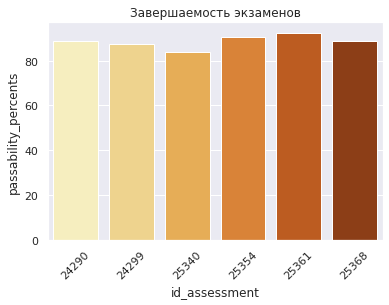

In [35]:
ax = sns.barplot(x='id_assessment', y='passability_percents', data = passability_of_exams, palette = "YlOrBr")
ax.tick_params(axis = 'x', rotation = 45)
ax.set(title='Завершаемость экзаменов')

Таким образом, всего было 6 экзаменов по двум предметам: ССС и DDD

<font color = 'bordo'>Самый простой экзамен (с самой высокой завершаемостью):

In [36]:
passability_of_exams[['code_module','code_presentation','id_assessment','passability_percents']].tail(1)

,code_module,code_presentation,id_assessment,passability_percents
2,DDD,2013B,25340,83.72093


<font color = 'bordo'>Самый сложный экзамен (с самой низкой завершаемостью):

In [37]:
passability_of_exams[['code_module','code_presentation','id_assessment','passability_percents']].head(1)

,code_module,code_presentation,id_assessment,passability_percents
4,DDD,2014B,25361,92.557252


<font color = 'blue'>3. Cредний срок сдачи экзаменов по каждому предмету  

*Сдача - последнее успешное прохождение экзамена студентом

In [38]:
#есть ли в данных повторы строк сдачи одного экзамена от одного студента?
Assessments_big.query("assessment_type=='Exam'") \
    .duplicated(subset=['id_assessment','id_student']) \
    .unique()

array([False])

Так как в данных нет строк с одинаковыми id_assessment и id_student, можем подсчитать время сдачи по каждой строке

In [39]:
exams_assessment = Assessments_big.query("assessment_type=='Exam'")

In [40]:
exams_assessment['achievement_time'] = exams_assessment.date - exams_assessment.date_submitted 
#coздали колонку с длительностью сдачи экзамена

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [41]:
exams_assessment = exams_assessment.query('achievement_time>=0').sort_values('achievement_time', ascending = False)
#отсортировали по убыванию длительности и убрали отрицательные значения экзаменов без даты сдачи
exams_assessment

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight,achievement_time
82712,25354,590918,236,0,36.0,DDD,2013J,Exam,261.0,100.0,25.0
83030,25354,71209,237,0,44.0,DDD,2013J,Exam,261.0,100.0,24.0
82538,25354,571808,237,0,60.0,DDD,2013J,Exam,261.0,100.0,24.0
82527,25354,570871,237,0,69.0,DDD,2013J,Exam,261.0,100.0,24.0
82529,25354,570896,237,0,62.0,DDD,2013J,Exam,261.0,100.0,24.0
...,...,...,...,...,...,...,...,...,...,...,...
87695,25361,613107,238,0,89.0,DDD,2014B,Exam,241.0,100.0,3.0
87461,25361,118479,238,0,84.0,DDD,2014B,Exam,241.0,100.0,3.0
87894,25361,634420,238,0,58.0,DDD,2014B,Exam,241.0,100.0,3.0
87969,25361,2692948,238,0,53.0,DDD,2014B,Exam,241.0,100.0,3.0


Таким образом, мы не можем узнать время, потраченное на сдачу тех экзаменов, где не стоит date - оно будет отрицательным

<font color = 'green'>Распределение количества дней, потраченного на сдачу экзамена студентами, от первой попытки до последней успешной:

Text(0, 0.5, 'Количество студентов')

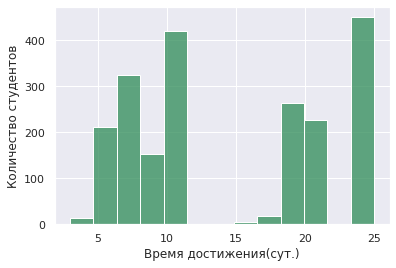

In [42]:
ax = sns.histplot(exams_assessment['achievement_time'], kde = False, color = 'seagreen')
ax.set_xlabel('Время достижения(сут.)')
ax.set_ylabel('Количество студентов')

У распределения две моды

<font color = 'bordo'>Cредний срок сдачи экзаменов:

In [43]:
#при расчете общего среднего:
round(exams_assessment['achievement_time'].mean())

14

In [44]:
#медианное значение:
round(exams_assessment['achievement_time'].median())

11

Рассмотрим сроки сдачи экзаменов по каждому предмету в отдельности

In [104]:
exams_assessment.code_module.unique()

array(['DDD'], dtype=object)

In [101]:
exams_assessment.id_assessment.unique()

array([25354, 25340, 25361])

In [105]:
exams_assessment.code_presentation.unique()

array(['2013J', '2013B', '2014B'], dtype=object)

Так как дата сдачи стояла только у предметов по модулю DDD,    
достоверно можно определить только его сдачу в разные семестры:

In [106]:
exams_assessment.groupby(['code_module','code_presentation']).agg({'achievement_time':'mean'}) 

achievement_time
code_module code_presentation                  
DDD         2013B                      9.904682
            2013J                     21.494835
            2014B                      6.113244

<font color = 'blue'> 4.1. Cамые популярные предметы (ТОП-3) по количеству регистраций на них 

In [45]:
studentRegistration.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN


code_module — предмет (идентификационный код).

code_presentation — семестр (идентификационный код)

id_student — идентификационный номер студента.

date_registration — дата регистрации студента. Это количество дней, измеренное от начала семестра (например, отрицательное значение -30 означает, что студент зарегистрировался на прохождение курса за 30 дней до его начала).

date_unregistration — дата отмены регистрации студента с предмета. У студентов, окончивших курс, это поле остается пустым.

<font color = 'bordo'> ТОП-3 предмета с учетом семестров:

*по количеству зарегестрировавшихся студентов

In [46]:
students_by_modules = studentRegistration \
    .groupby(['code_module', 'code_presentation'], as_index = False) \
    .agg({'id_student':'count'}) \
    .rename(columns = {'id_student':'number_of_students'}) \
    .sort_values('number_of_students', ascending = False)
students_by_modules.head(3)

,code_module,code_presentation,number_of_students
7,CCC,2014J,2498
18,FFF,2014J,2365
5,BBB,2014J,2292


*При этом на всех 22 предметах были зарегестрированные студенты

<font color = 'bordo'> ТОП-3 предмета (без учета семестров):

*по количеству зарегестрировавшихся студентов

In [47]:
students_by_modules_total = studentRegistration \
    .groupby(['code_module'], as_index = False) \
    .agg({'id_student':'count'}) \
    .rename(columns = {'id_student':'number_of_students'})     
students_by_modules_total.sort_values('number_of_students', ascending = False).head(3)

,code_module,number_of_students
1,BBB,7909
5,FFF,7762
3,DDD,6272


[Text(0.5, 1.0, 'Количество студентов по предметам')]

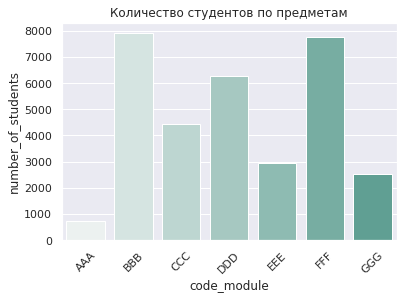

In [48]:
ax = sns.barplot(x='code_module', y='number_of_students', data = students_by_modules_total, palette = "light:#5A9")
ax.tick_params(axis = 'x', rotation = 45)
ax.set(title='Количество студентов по предметам')

<font color = 'blue'> 4.2. Предметы с самым большим оттоком (ТОП-3).

*Отток считаю как количество студентов, у которых заполнена date_unregistration

<font color = 'bordo'> Предметы с самым большим оттоком (ТОП-3) с учетом семестра:

In [49]:
#число студентов, не закончивших предметы:
cancelled_students = studentRegistration.query('date_unregistration!="NaN"') \
    .groupby(['code_module', 'code_presentation'], as_index = False) \
    .agg({'id_student':'count'}) \
    .rename(columns = {'id_student':'number_of_cancelled_students'}) \
    .sort_values('number_of_cancelled_students', ascending = False)
cancelled_students.head(3)

,code_module,code_presentation,number_of_cancelled_students
7,CCC,2014J,1049
6,CCC,2014B,898
18,FFF,2014J,831


number_of_cancelled_students и есть отток в абсолютной величине (количестве студентов отменивших регистрацию)

<font color = 'bordo'> Предметы с самым большим оттоком (ТОП-3) по всем модулям:

In [50]:
cancelled_students.groupby('code_module', as_index = False) \
    .agg({'number_of_cancelled_students':'sum'}) \
    .sort_values('number_of_cancelled_students', ascending = False) \
    .head(3)

,code_module,number_of_cancelled_students
5,FFF,2380
1,BBB,2377
3,DDD,2235


Рассчитаем отток в относительной величине:    
*количество студентов, отменивших регистрацию/количество всех студентов, зарегестрировавшихся на данный курс


In [51]:
students_number = (cancelled_students.merge(students_by_modules, how='inner', on=['code_module','code_presentation'],
                                             indicator=False))
students_number.head()

,code_module,code_presentation,number_of_cancelled_students,number_of_students
0,CCC,2014J,1049,2498
1,CCC,2014B,898,1936
2,FFF,2014J,831,2365
3,BBB,2014J,736,2292
4,DDD,2013J,684,1938


In [52]:
students_number['outflow_percents'] = 100*students_number.number_of_cancelled_students/students_number.number_of_students

<font color = 'bordo'> Предметы с самым большим оттоком в процентах (ТОП-3)

In [53]:
#по семестрам
students_number.sort_values('outflow_percents', ascending = False).head(3)

,code_module,code_presentation,number_of_cancelled_students,number_of_students,outflow_percents
1,CCC,2014B,898,1936,46.384298
0,CCC,2014J,1049,2498,41.993595
10,DDD,2014B,489,1228,39.820847


In [54]:
students_number_by_module = students_number.groupby('code_module', as_index = False) \
    .agg({'number_of_cancelled_students':'sum','number_of_students':'sum' }) \
    
students_number_by_module['outflow_percents'] = 100*students_number_by_module.number_of_cancelled_students/students_number_by_module.number_of_students

In [55]:
#по предметам за все семестры
students_number_by_module.sort_values('outflow_percents', ascending = False).head(3)

,code_module,number_of_cancelled_students,number_of_students,outflow_percents
2,CCC,1947,4434,43.910690
3,DDD,2235,6272,35.634566
5,FFF,2380,7762,30.662200


[Text(0.5, 1.0, 'Отток студентов с предметов')]

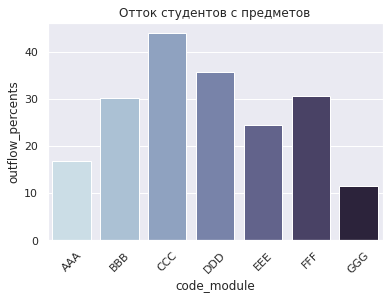

In [56]:
ax = sns.barplot(x='code_module', y='outflow_percents', data = students_number_by_module, palette = "ch:s=.25,rot=-.25")
ax.tick_params(axis = 'x', rotation = 45)
ax.set(title='Отток студентов с предметов')

<font color = 'blue'>5.1. Cеместр с самой низкой завершаемостью курсов в период с начала 2013 по конец 2014 

In [57]:
passability_by_term = passability_of_exams \
    .groupby('code_presentation', as_index = False) \
    .agg({'number_of_exam_results':'sum','number_of_success_exam_results':'sum'})

In [58]:
passability_by_term['passability_percents'] = 100*passability_by_term.number_of_success_exam_results/passability_by_term.number_of_exam_results
passability_by_term = passability_by_term.sort_values('passability_percents', ascending = False)
passability_by_term

,code_presentation,number_of_exam_results,number_of_success_exam_results,passability_percents
1,2013J,968,878,90.702479
2,2014B,1271,1149,90.401259
3,2014J,2118,1861,87.865911
0,2013B,602,504,83.720930


<font color = 'bordo'>Cеместр с самой низкой завершаемостью:

In [59]:
passability_by_term.tail(1)

,code_presentation,number_of_exam_results,number_of_success_exam_results,passability_percents
0,2013B,602,504,83.72093


<font color = 'blue'>5.2. Cеместр с самыми долгими средними сроками сдачи курсов в период с начала 2013 по конец 2014 

In [60]:
achievement_time_by_term = exams_assessment \
    .groupby('code_presentation', as_index = False) \
    .agg({'achievement_time':'mean'}) \
    .sort_values('achievement_time', ascending = False)
achievement_time_by_term

,code_presentation,achievement_time
1,2013J,21.494835
0,2013B,9.904682
2,2014B,6.113244


<font color = 'bordo'>Cеместр с самыми долгими средними сроками сдачи курсов

In [61]:
achievement_time_by_term.head(1)

,code_presentation,achievement_time
1,2013J,21.494835


 <font color = 'blue'>6. Построение адаптированных RFM-кластеров студентов.
      
        Метрики:   
            R (recency)   - среднее время сдачи одного экзамена (achievement_time),  
            F (frequency) - завершаемость курсов (passability),  
            M (monetary)  - среднее количество баллов, получаемое за экзамен(mean_score).  

Рассмотрим еще раз таблицы, из которых будем брать метрики

In [62]:
#R
exams_assessment

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight,achievement_time
82712,25354,590918,236,0,36.0,DDD,2013J,Exam,261.0,100.0,25.0
83030,25354,71209,237,0,44.0,DDD,2013J,Exam,261.0,100.0,24.0
82538,25354,571808,237,0,60.0,DDD,2013J,Exam,261.0,100.0,24.0
82527,25354,570871,237,0,69.0,DDD,2013J,Exam,261.0,100.0,24.0
82529,25354,570896,237,0,62.0,DDD,2013J,Exam,261.0,100.0,24.0
...,...,...,...,...,...,...,...,...,...,...,...
87695,25361,613107,238,0,89.0,DDD,2014B,Exam,241.0,100.0,3.0
87461,25361,118479,238,0,84.0,DDD,2014B,Exam,241.0,100.0,3.0
87894,25361,634420,238,0,58.0,DDD,2014B,Exam,241.0,100.0,3.0
87969,25361,2692948,238,0,53.0,DDD,2014B,Exam,241.0,100.0,3.0


In [63]:
#F
#M
Assessments_big

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight
0,1752,11391,18,0,78.0,AAA,2013J,TMA,19.0,10.0
1,1752,28400,22,0,70.0,AAA,2013J,TMA,19.0,10.0
2,1752,31604,17,0,72.0,AAA,2013J,TMA,19.0,10.0
3,1752,32885,26,0,69.0,AAA,2013J,TMA,19.0,10.0
4,1752,38053,19,0,79.0,AAA,2013J,TMA,19.0,10.0
...,...,...,...,...,...,...,...,...,...,...
173907,37443,527538,227,0,60.0,GGG,2014J,CMA,229.0,0.0
173908,37443,534672,229,0,100.0,GGG,2014J,CMA,229.0,0.0
173909,37443,546286,215,0,80.0,GGG,2014J,CMA,229.0,0.0
173910,37443,546724,230,0,100.0,GGG,2014J,CMA,229.0,0.0


Нужно получить таблицу со всеми метриками для каждого студента.  
То есть, состоящую из колонок: id_student,	    Recency,	    Frequency,  	  Monetary.  
Или в моих терминах: id_student,	    achievement_time,	    passability,  	  mean_score.

<font color = 'green'>R

In [64]:
#ищем среднее achievement_time для каждого студента
mean_achievement_time = exams_assessment \
    .groupby('id_student', as_index = False) \
    .agg({'achievement_time':'mean'}) \
    .rename(columns = {'achievement_time':'R_mean_achievement_time'})
mean_achievement_time.sort_values('R_mean_achievement_time', ascending = False)

,id_student,R_mean_achievement_time
1359,590918,25.0
1149,571242,24.0
2010,2550054,24.0
1323,588178,24.0
1937,2342399,24.0
...,...,...
1631,619297,3.0
1796,634420,3.0
2079,2692948,3.0
53,118479,3.0


<font color = 'green'>F

In [65]:
#ищем среднюю завершаемость (passability) экзаменов каждого студента
#её рассчитываем отдельно как количество экзаменов, сданное студентом(score>=40) / кол-во всех экзаменов, которые он сдавал

In [66]:
success_exams_per_student = Assessments_big \
    .query("assessment_type=='Exam' & score>=40 & is_banked==0") \
    .groupby('id_student', as_index = False) \
    .agg({'score':'count'}) \
    .rename(columns = {'score':'success_exams_per_student'})

In [67]:
#количество экзаменов, найденное по количеству всех оценок студента
exams_per_student = Assessments_big \
    .query("assessment_type=='Exam' & is_banked==0") \
    .groupby('id_student', as_index = False) \
    .agg({'score':'count'}) \
    .rename(columns = {'score':'exams_per_student'})

In [68]:
exams_per_student_total = (exams_per_student.merge(success_exams_per_student, 
                                            how='left', on='id_student', indicator=False))

In [69]:
exams_per_student_total = exams_per_student_total.fillna(0)

In [70]:
exams_per_student_total.sort_values('success_exams_per_student', ascending = False)#.head()

,id_student,exams_per_student,success_exams_per_student
2316,588482,2,2.0
3013,624789,2,2.0
2530,599109,2,2.0
530,351775,2,2.0
3020,624927,2,2.0
...,...,...,...
967,472309,1,0.0
4137,1577134,1,0.0
3071,626714,1,0.0
1497,541228,1,0.0


In [71]:
exams_per_student_total['F_passability_student_percent'] = 100*exams_per_student_total.success_exams_per_student/exams_per_student_total.exams_per_student

In [72]:
exams_per_student_total.head()

,id_student,exams_per_student,success_exams_per_student,F_passability_student_percent
0,23698,1,1.0,100.0
1,24213,1,1.0,100.0
2,27116,1,1.0,100.0
3,28046,1,1.0,100.0
4,28787,1,1.0,100.0


In [73]:
exams_per_student_total['F_passability_student_percent'].mean() 
#проверка на соответствие предыдущим расчетам проходимости курсов

88.12864234837039

In [74]:
exams_per_student_total['F_passability_student_percent'].value_counts()

100.0    4069
0.0       536
50.0       28
Name: F_passability_student_percent, dtype: int64

<font color = 'green'>M

In [75]:
#Ищем средний балл студентов за экзамены (mean_score)
mean_score_per_student = Assessments_big \
    .query("assessment_type=='Exam' & is_banked==0") \
    .groupby('id_student', as_index = False) \
    .agg({'score':'mean'}) \
    .rename(columns = {'score':'M_mean_score'})
mean_score_per_student.sort_values('M_mean_score', ascending = False)

,id_student,M_mean_score
3599,652902,100.0
3228,631473,100.0
2309,588274,100.0
3101,627401,100.0
4290,2131908,100.0
...,...,...
492,338034,7.0
4529,2588543,4.0
1736,556660,0.0
137,131152,0.0


In [76]:
#Объединим полученные таблицы
RF = (mean_achievement_time.merge(exams_per_student_total, 
                                            how='left', on='id_student', indicator=False))
RFM = (RF.merge(mean_score_per_student, 
                                            how='inner', on='id_student', indicator=False))
RFM = RFM.drop(columns = ['exams_per_student','success_exams_per_student'])
RFM.sort_values('F_passability_student_percent', ascending = False)

,id_student,R_mean_achievement_time,F_passability_student_percent,M_mean_score
0,24213,5.0,100.0,58.0
1374,592577,20.0,100.0,71.0
1372,592465,7.0,100.0,71.0
1371,592382,20.0,100.0,73.0
1370,592252,24.0,100.0,73.0
...,...,...,...,...
290,365397,7.0,0.0,22.0
292,366024,10.0,0.0,29.0
1245,579134,4.0,0.0,33.0
767,531075,10.0,0.0,33.0


У меня есть значения параметров Recency, Frequency and Monetary.  
Каждому студенту теперь нужно распределить баллы 1 до 5 по каждому параметру.  
Воспользуемся методом квантилей.

In [77]:
quintiles = RFM[['R_mean_achievement_time', 'F_passability_student_percent', 'M_mean_score']].quantile([.25, .5, .75]).to_dict()
quintiles

{'R_mean_achievement_time': {0.25: 7.0, 0.5: 11.0, 0.75: 20.0},
 'F_passability_student_percent': {0.25: 100.0, 0.5: 100.0, 0.75: 100.0},
 'M_mean_score': {0.25: 49.0, 0.5: 64.0, 0.75: 78.0}}

<font color = green>Распределения значений для RFM метрик

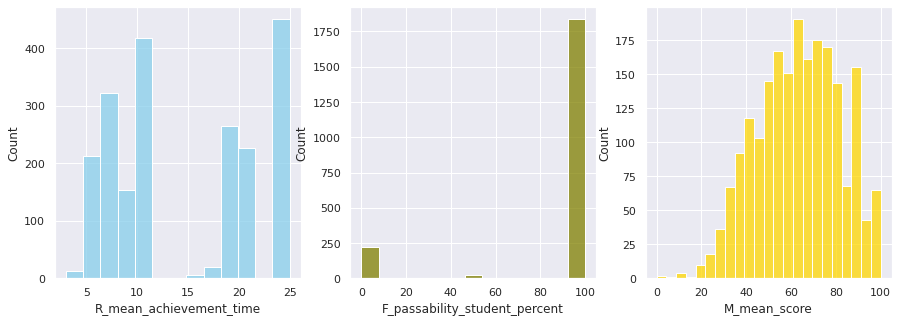

In [78]:
fig, axes = plt.subplots(1, 3, figsize=(15,5))

sns.histplot(data=RFM, x="R_mean_achievement_time", kde=False, color="skyblue", ax=axes[0])
sns.histplot(data=RFM, x="F_passability_student_percent", kde=False, color="olive", ax=axes[1])
sns.histplot(data=RFM, x="M_mean_score", kde=False, color="gold", ax=axes[2])

In [79]:
RFM.F_passability_student_percent.unique()

array([100.,   0.,  50.])

Таким образом, F_passability_student_percent имеет только 3 значения - по ним и разделим на сегменты.  
Для оставшихся данных выберем разделение на 4 сегмента.

<font color = green> Функции для присвоения рангов:

Баллы будут выше, когда  
&emsp;R_mean_achievement_time       меньше,  
&emsp;F_passability_student_percent выше,  
&emsp;M_mean_score                  выше.  

In [80]:
def r_score(x):
    if x <= quintiles['R_mean_achievement_time'][.25]:
        return 4
    elif x <= quintiles['R_mean_achievement_time'][.5]:
        return 3
    elif x <= quintiles['R_mean_achievement_time'][.75]:
        return 2
    else:
        return 1

def f_score(x):
    if x < 50:
        return 1
    elif x < 100:
        return 2
    else:
        return 3  
    
def m_score(x):
    if x <= quintiles['M_mean_score'][.25]:
        return 1
    elif x <= quintiles['M_mean_score'][.50]:
        return 2
    elif x <= quintiles['M_mean_score'][.75]:
        return 3
    else:
        return 4    

In [81]:
RFM['R'] = RFM['R_mean_achievement_time'].apply(lambda x: r_score(x))
RFM['F'] = RFM['F_passability_student_percent'].apply(lambda x: f_score(x))
RFM['M'] = RFM['M_mean_score'].apply(lambda x: m_score(x))

In [82]:
#Finally, I combine the R, F and M scores into a RFM Score.
RFM['RFM_Score'] = RFM['R'].map(str) + RFM['F'].map(str) + RFM['M'].map(str)
RFM#.head()

,id_student,R_mean_achievement_time,F_passability_student_percent,M_mean_score,R,F,M,RFM_Score
0,24213,5.0,100.0,58.0,4,3,2,432
1,28046,24.0,100.0,40.0,1,3,1,131
2,29411,24.0,100.0,62.0,1,3,2,132
3,31173,19.0,0.0,27.0,2,1,1,211
4,33930,24.0,100.0,67.0,1,3,3,133
...,...,...,...,...,...,...,...,...
2080,2693243,10.0,100.0,82.0,3,3,4,334
2081,2694886,5.0,100.0,69.0,4,3,3,433
2082,2694933,10.0,100.0,73.0,3,3,3,333
2083,2695608,24.0,100.0,73.0,1,3,3,133


Оценки RFM дают нам 4'3'4 = 75 сегментов.  
Оставим 11 сегментов на основе показателей R_mean_achievement_time и F_passability_student_percent.  
Вот описание сегментов:

In [83]:
segt_map = {
    r'[1-4]1': 'ничего не сдали',
    r'[1-4]2': 'сдали половину',
    r'[1-2]3': 'медленно, но верно',
    r'33': 'умнички',
    r'43': 'лучшие',
}

RFM['Segment'] = RFM['R'].map(str) + RFM['F'].map(str)
RFM['Segment'] = RFM['Segment'].replace(segt_map, regex=True)
RFM.head()

,id_student,R_mean_achievement_time,F_passability_student_percent,M_mean_score,R,F,M,RFM_Score,Segment
0,24213,5.0,100.0,58.0,4,3,2,432,лучшие
1,28046,24.0,100.0,40.0,1,3,1,131,"медленно, но верно"
2,29411,24.0,100.0,62.0,1,3,2,132,"медленно, но верно"
3,31173,19.0,0.0,27.0,2,1,1,211,ничего не сдали
4,33930,24.0,100.0,67.0,1,3,3,133,"медленно, но верно"


In [84]:
RFM.R.describe()

count    2085.000000
mean        2.583213
std         1.095448
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: R, dtype: float64

In [85]:
# Calculate average values for each RFM_Level, and return a size of each segment 
rfm_level_agg = RFM \
    .groupby('Segment') \
    .agg({
    'R_mean_achievement_time': 'mean',
    'F_passability_student_percent': 'mean',
    'M_mean_score': ['mean', 'count']
    }) \
    .round(1)
rfm_level_agg

R_mean_achievement_time F_passability_student_percent  \
                                      mean                          mean   
Segment                                                                    
лучшие                                 6.2                         100.0   
медленно, но верно                    21.5                         100.0   
ничего не сдали                       13.9                           0.0   
сдали половину                        11.9                          50.0   
умнички                               10.0                         100.0   

                   M_mean_score        
                           mean count  
Segment                                
лучшие                     72.0   493  
медленно, но верно         68.5   869  
ничего не сдали            31.4   225  
сдали половину             45.7    25  
умнички                    61.3   473

In [86]:
#Тут должно было быть treemap, но нет squarify(
rfm_level_agg.columns = rfm_level_agg.columns.droplevel()
rfm_level_agg.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'Count']


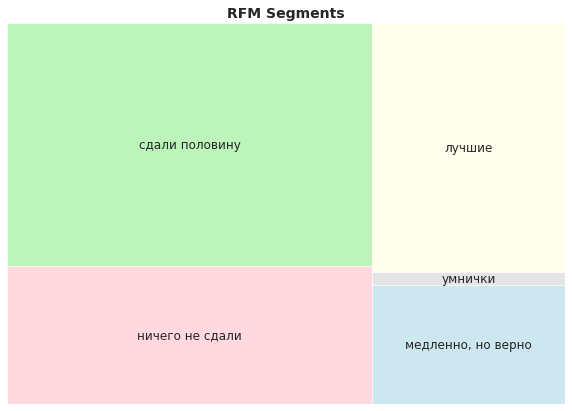

In [87]:
#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(10, 7)
squarify.plot(sizes=rfm_level_agg['Count'], 
              label=['ничего не сдали',
                     'сдали половину',
                     'медленно, но верно',
                     'умнички',
                     'лучшие'], color=["pink","lightgreen","lightblue", "lightgrey", "lightyellow"], alpha=.6 )

plt.title("RFM Segments",fontsize=14,fontweight="bold")
plt.axis('off')
plt.show()

<font color = 'bordo'> Визуализация RFM 

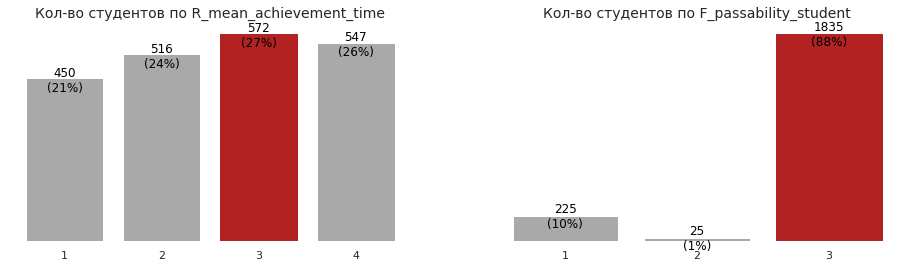

In [88]:
# plot the distribution of customers over R and F
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))

for i, p in enumerate(['R', 'F']):
    parameters = {'R':'R_mean_achievement_time', 'F':'F_passability_student'}
    y = RFM[p].value_counts().sort_index()
    x = y.index
    ax = axes[i]
    bars = ax.bar(x, y, color='darkgrey')
    ax.set_frame_on(False)
    ax.locator_params(axis ='x', tight=True, nbins=5)
    ax.tick_params(left=False, labelleft=False, bottom=False)
    ax.set_title('Кол-во студентов по {}'.format(parameters[p]),
                fontsize=14)
    for bar in bars:
        value = bar.get_height()
        if value == y.max():
            bar.set_color('firebrick')
        ax.text(bar.get_x() + bar.get_width() / 2,
                value - 5,
                '{}\n({}%)'.format(int(value), int(value * 100 / y.sum())),
               ha='center',
               va='center',
               color='black')

plt.show()

Наибольшее число студентов сдавали экзамены во втором по быстроте эшелоне. После разделения на 4 когорты выяснилось, что во всех четырех группах порядка 20-25% студентов.  
100% проходимость экзаменов продемострировали 88% студентов. Очень малая часть(1%) сдали половину экзаменов, в которых участвовали, и 10% студентов ни сдали ни одного своего экзамена.

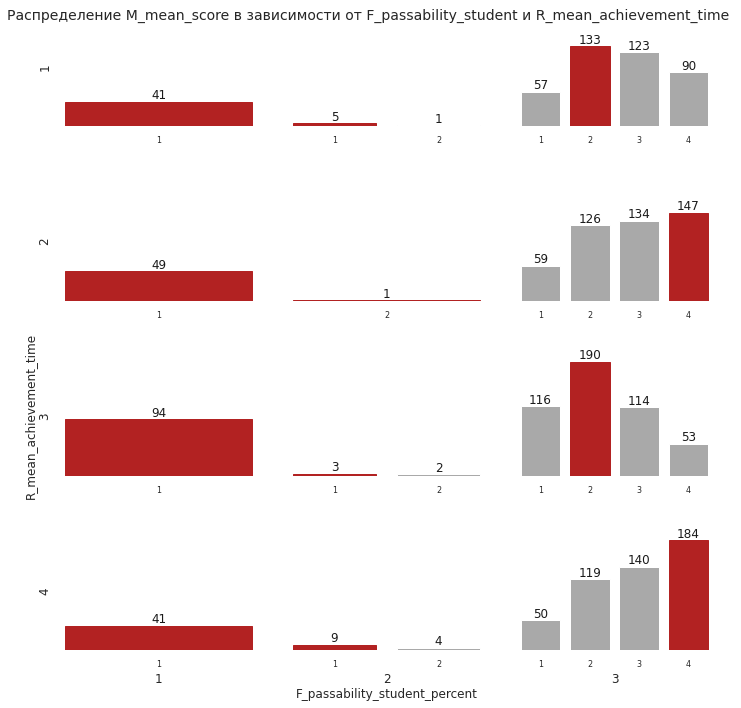

In [89]:
# plot the distribution of M for RF score
fig, axes = plt.subplots(nrows=4, ncols=3,
                         sharex=False, sharey=True,
                         figsize=(10, 10))

r_range = range(1, 5)
f_range = range(1, 4)
for r in r_range:
    for f in f_range:
        y = RFM[(RFM['R'] == r) & (RFM['F'] == f)]['M'].value_counts().sort_index()
        x = y.index
        ax = axes[r - 1, f - 1]
        bars = ax.bar(x, y, color='darkgrey')
        if r == 4:
            if f == 2:
                ax.set_xlabel('{}\nF_passability_student_percent'.format(f), va='top')
            else:
                ax.set_xlabel('{}\n'.format(f), va='top')
        if f == 1:
            if r == 3:
                ax.set_ylabel('R_mean_achievement_time\n{}'.format(r))
            else:
                ax.set_ylabel(r)
        ax.set_frame_on(False)
        ax.tick_params(left=False, labelleft=False, bottom=False)
        ax.set_xticks(x)
        ax.set_xticklabels(x, fontsize=8)

        for bar in bars:
            value = bar.get_height()
            if value == y.max():
                bar.set_color('firebrick')
            ax.text(bar.get_x() + bar.get_width() / 2,
                    value,
                    int(value),
                    ha='center',
                    va='bottom',
                    color='k')
fig.suptitle('Распределение M_mean_score в зависимости от F_passability_student и R_mean_achievement_time ',
             fontsize=14)
plt.tight_layout()
plt.show()

1 столбец:  
студенты, которые не сдали ни одного экзамена, соответственно и все их оценки - нули;  
2 столбец:  
т к (см предыдущий барплот) очень мало студентов сдало половину экзаменов, и данных для рассмотрения распределения не достаточно;  
3 столбец:  
студенты, которые сдали все экзамены. Чем выше R, тем быстрее студент сдал экзамен.  
Диаграмма в верхнем правом углу - среди самых "медленные" студентов больше всего тех, чей средний бал во второй с конца группе.  
Смотрим ниже. "Достаточно медленные" студенты, тем не менее, часто получают высокие баллы.  
И третья сверху диаграмма справа - средние по скорости сдачи студентов чаще всего получают средние оценки.  
Диаграмма в нижнем правом углу - среди самых "быстрых" студентов больше всего тех, у кого и средний бал самый высокий.

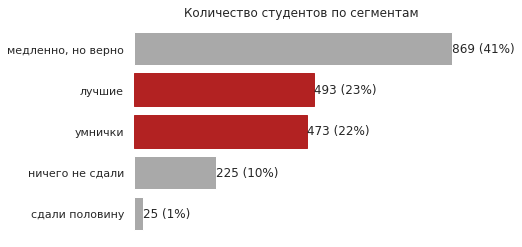

In [90]:
# count the number of customers in each segment
segments_counts = RFM['Segment'].value_counts().sort_values(ascending=True)

fig, ax = plt.subplots()

bars = ax.barh(range(len(segments_counts)),
              segments_counts,
              color='darkgrey')
ax.set_frame_on(False)
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)
ax.set_yticks(range(len(segments_counts)))
ax.set_yticklabels(segments_counts.index)
ax.set(title='Количество студентов по сегментам')

for i, bar in enumerate(bars):
        value = bar.get_width()
        if segments_counts.index[i] in ['умнички', 'лучшие']:
            bar.set_color('firebrick')
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:,} ({:}%)'.format(int(value),
                                   int(value*100/segments_counts.sum())),
                va='center',
                ha='left'
               )

plt.show()

Наибольшее число студентов сдавали экзамены дольше, но при этом сдали все.  
45% от всех - студенты с лучшими оценками, сдававшие все как можно быстрее.  
Ни одного экзамена не сдали 10% студентов.  
И половину экзаменов сдал 1% от всех студентов.